# Introduction to deep learning

<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Dataset-cleaning" data-toc-modified-id="Dataset-cleaning-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Dataset cleaning</a></span></li><li><span><a href="#Feature-selection-and-encoding" data-toc-modified-id="Feature-selection-and-encoding-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Feature selection and encoding</a></span></li><li><span><a href="#Model-building" data-toc-modified-id="Model-building-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model building</a></span><ul class="toc-item"><li><span><a href="#Baseline-with-logistic-regression" data-toc-modified-id="Baseline-with-logistic-regression-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Baseline with logistic regression</a></span></li></ul></li></ul></div>

## Dataset cleaning

In [ ]:
TRAIN="http://www.i3s.unice.fr/~riveill/dataset/MIMIC-III-readmission/train.csv.zip"
VAL="http://www.i3s.unice.fr/~riveill/dataset/MIMIC-III-readmission/val.csv.zip"
TEST="http://www.i3s.unice.fr/~riveill/dataset/MIMIC-III-readmission/test.csv.zip"

In [ ]:
import ssl
import pandas as pd
ssl._create_default_https_context = ssl._create_unverified_context
train = pd.read_csv(TRAIN)
test = pd.read_csv(TEST)

In [ ]:
# Remove uninteresting columns
to_drop = ['SUBJECT_ID', 'HADM_ID'] # It's just database index, no interest
train = train.drop(to_drop, axis=1)
test = test.drop(to_drop, axis=1)

In [ ]:
# Try to understand the dataset
train.head()

,ADMITTIME,DISCHTIME,DAYS_NEXT_ADMIT,NEXT_ADMITTIME,ADMISSION_TYPE,DEATHTIME,DISCHARGE_LOCATION,INSURANCE,MARITAL_STATUS,ETHNICITY,...,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,OUTPUT_LABEL
0,2163-01-20 18:39:00,2163-01-24 08:00:00,0.061806,2163-01-24 09:29:00,EMERGENCY,2163-01-26 08:00:00,DEAD/EXPIRED,Medicare,NaN,OTHER/UNKNOWN,...,0,0,0,0,1,0,0,0,0,1
1,2107-01-23 02:45:00,2107-01-26 14:00:00,NaN,NaN,EMERGENCY,NaN,HOME HEALTH CARE,Medicare,MARRIED,WHITE,...,2,0,0,0,0,0,0,1,0,0
2,2134-06-24 23:30:00,2134-07-02 17:45:00,NaN,NaN,EMERGENCY,NaN,REHAB/DISTINCT PART HOSP,Medicaid,SINGLE,WHITE,...,1,2,1,0,3,0,0,4,0,0
3,2202-11-02 12:32:00,2202-11-05 14:20:00,12.968056,2202-11-18 13:34:00,EMERGENCY,NaN,HOME,Medicare,SINGLE,BLACK/AFRICAN AMERICAN,...,0,0,0,0,0,0,0,1,1,1
4,2149-05-13 12:23:00,2149-05-26 20:00:00,NaN,NaN,EMERGENCY,NaN,HOME HEALTH CARE,Medicare,NaN,OTHER/UNKNOWN,...,0,0,0,0,0,0,0,2,1,0


In [ ]:
# Try to understand the dataset
train.describe()

,DAYS_NEXT_ADMIT,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,OUTPUT_LABEL
count,1210.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.0000
mean,119.883433,0.482500,2.858000,0.036000,0.747500,1.389000,0.660500,0.438500,2.206000,0.447500,0.430500,0.216000,0.255500,0.421000,0.008000,0.119000,0.972500,0.189000,0.5050
std,404.753993,0.735503,2.253969,0.196783,1.179593,1.329121,0.895902,0.809658,2.233172,0.847114,0.739894,0.544511,0.704605,0.801299,0.151484,0.376709,1.199359,0.551753,0.5001
min,-0.602083,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
25%,5.383333,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0000
50%,13.219792,0.000000,3.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.0000
75%,25.327951,1.000000,4.000000,0.000000,1.000000,2.000000,1.000000,1.000000,3.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,2.000000,0.000000,1.0000
max,3867.977778,5.000000,13.000000,2.000000,9.000000,10.000000,4.000000,7.000000,15.000000,9.000000,5.000000,5.000000,8.000000,7.000000,4.000000,5.000000,6.000000,6.000000,1.0000


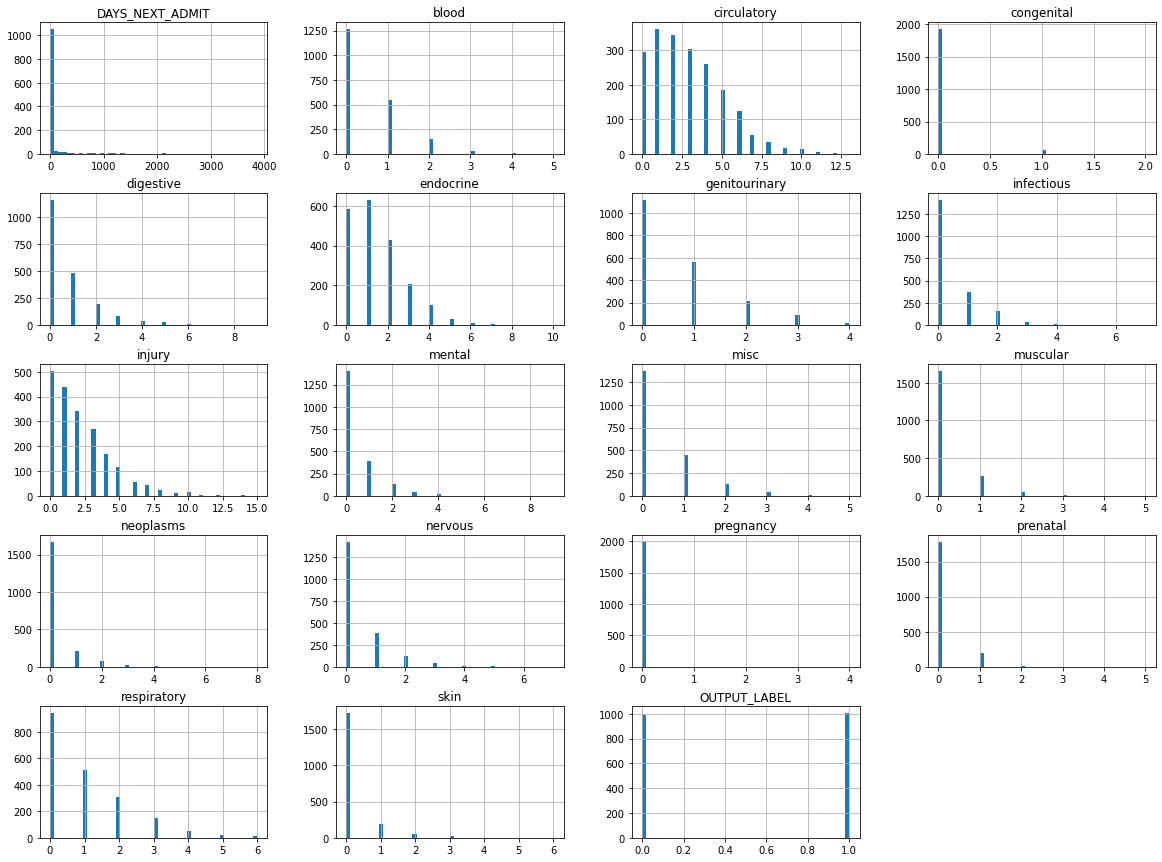

In [ ]:
# Try to understand the dataset

train.hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
# Check if there is missing value
if train.isna().any().any() or test.isna().any().any():
    print("There is missing value")
    print(train.isna().sum())
    
''' Conclusion:
There are many missing values for the columns: DAYS_NEXT_ADMIT, NEXT_ADMITTIME, DEATHTIME.
This is quite understandable because if the person is not readmitted to hospital then the
readmission date doesn't make sense (concerns DAYS_NEXT_ADMIT, NEXT_ADMITTIME).

Similarly, if the person is not deceased, the date of death is not known (DEATHTIME).

Since we want to predict the next rehospitalization, we will ignore :
- the columns DAYS_NEXT_ADMIT, NEXT_ADMITTIME
- as well as all the lines for which the person died during his hospitalization (DEATHTIME)
(he will no longer be re-hospitalized).

The other two columns with missing values are : 
- MARITAL_STATUS, when we are going to encode this variable, there will be a special
category that will correspond to the fact that we don't have the information
- TEXT, these are patient records for which we do not have a medical report.
We will act as if we had an empty text
- DIAGNOSIS, we will delete this column because it has already been encoded
by the columns: bloob to skin
''';

There is missing value
ADMITTIME                0
DISCHTIME                0
DAYS_NEXT_ADMIT        790
NEXT_ADMITTIME         790
ADMISSION_TYPE           0
DEATHTIME             1842
DISCHARGE_LOCATION       0
INSURANCE                0
MARITAL_STATUS          76
ETHNICITY                0
DIAGNOSIS                2
TEXT                    75
GENDER                   0
DOB                      0
blood                    0
circulatory              0
congenital               0
digestive                0
endocrine                0
genitourinary            0
infectious               0
injury                   0
mental                   0
misc                     0
muscular                 0
neoplasms                0
nervous                  0
pregnancy                0
prenatal                 0
respiratory              0
skin                     0
OUTPUT_LABEL             0
dtype: int64


In [ ]:
to_drop = ['DAYS_NEXT_ADMIT', 'NEXT_ADMITTIME', 'MARITAL_STATUS', 'DIAGNOSIS']
train = train.drop(to_drop, axis=1)
test = test.drop(to_drop, axis=1)
train.head()

,ADMITTIME,DISCHTIME,ADMISSION_TYPE,DEATHTIME,DISCHARGE_LOCATION,INSURANCE,ETHNICITY,TEXT,GENDER,DOB,...,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,OUTPUT_LABEL
0,2163-01-20 18:39:00,2163-01-24 08:00:00,EMERGENCY,2163-01-26 08:00:00,DEAD/EXPIRED,Medicare,OTHER/UNKNOWN,Admission Date: [**2163-1-20**] ...,M,2087-09-24 00:00:00,...,0,0,0,0,1,0,0,0,0,1
1,2107-01-23 02:45:00,2107-01-26 14:00:00,EMERGENCY,NaN,HOME HEALTH CARE,Medicare,WHITE,Admission Date: [**2107-1-23**] Discharge...,M,2028-04-07 00:00:00,...,2,0,0,0,0,0,0,1,0,0
2,2134-06-24 23:30:00,2134-07-02 17:45:00,EMERGENCY,NaN,REHAB/DISTINCT PART HOSP,Medicaid,WHITE,Admission Date: [**2134-6-24**] ...,M,2087-11-05 00:00:00,...,1,2,1,0,3,0,0,4,0,0
3,2202-11-02 12:32:00,2202-11-05 14:20:00,EMERGENCY,NaN,HOME,Medicare,BLACK/AFRICAN AMERICAN,Admission Date: [**2202-11-2**] Discharge...,F,2168-10-06 00:00:00,...,0,0,0,0,0,0,0,1,1,1
4,2149-05-13 12:23:00,2149-05-26 20:00:00,EMERGENCY,NaN,HOME HEALTH CARE,Medicare,OTHER/UNKNOWN,Admission Date: [**2149-5-13**] ...,F,2091-10-09 00:00:00,...,0,0,0,0,0,0,0,2,1,0


In [ ]:
train = train.loc[train['DEATHTIME'].isnull()].drop(['DEATHTIME'], axis=1)
test = test.loc[test['DEATHTIME'].isnull()].drop(['DEATHTIME'], axis=1)
train.head()

,ADMITTIME,DISCHTIME,ADMISSION_TYPE,DISCHARGE_LOCATION,INSURANCE,ETHNICITY,TEXT,GENDER,DOB,blood,...,mental,misc,muscular,neoplasms,nervous,pregnancy,prenatal,respiratory,skin,OUTPUT_LABEL
1,2107-01-23 02:45:00,2107-01-26 14:00:00,EMERGENCY,HOME HEALTH CARE,Medicare,WHITE,Admission Date: [**2107-1-23**] Discharge...,M,2028-04-07 00:00:00,0,...,2,0,0,0,0,0,0,1,0,0
2,2134-06-24 23:30:00,2134-07-02 17:45:00,EMERGENCY,REHAB/DISTINCT PART HOSP,Medicaid,WHITE,Admission Date: [**2134-6-24**] ...,M,2087-11-05 00:00:00,1,...,1,2,1,0,3,0,0,4,0,0
3,2202-11-02 12:32:00,2202-11-05 14:20:00,EMERGENCY,HOME,Medicare,BLACK/AFRICAN AMERICAN,Admission Date: [**2202-11-2**] Discharge...,F,2168-10-06 00:00:00,0,...,0,0,0,0,0,0,0,1,1,1
4,2149-05-13 12:23:00,2149-05-26 20:00:00,EMERGENCY,HOME HEALTH CARE,Medicare,OTHER/UNKNOWN,Admission Date: [**2149-5-13**] ...,F,2091-10-09 00:00:00,0,...,0,0,0,0,0,0,0,2,1,0
5,2156-06-02 08:00:00,2156-06-08 13:30:00,ELECTIVE,HOME HEALTH CARE,Medicare,WHITE,"Name: [**Known lastname 10188**], [**Known fi...",M,2070-10-02 00:00:00,0,...,1,0,0,0,0,0,0,0,0,0


## Feature selection and encoding

In [ ]:
# I select all pertinent feature except text

output = ['OUTPUT_LABEL']
remove = ['ADMITTIME', 'DISCHTIME', # It's possible to use length of stay: 'DISCHTIME'-'ADMITTIME'
          'TEXT',
          'DOB', # It's possible to use the age at admission time: 'ADMITTIME'-'DOB'
         ]

features = list(train.columns)
for x in output+remove:
    features.remove(x)

In [ ]:
X_train = train[features]
y_train = train[output]

X_test = test[features]
y_test = test[output]

X_train = pd.get_dummies(X_train)
X_test = pd.get_dummies(X_test)
X_train.head()

,blood,circulatory,congenital,digestive,endocrine,genitourinary,infectious,injury,mental,misc,...,INSURANCE_Medicare,INSURANCE_Private,INSURANCE_Self Pay,ETHNICITY_ASIAN,ETHNICITY_BLACK/AFRICAN AMERICAN,ETHNICITY_HISPANIC/LATINO,ETHNICITY_OTHER/UNKNOWN,ETHNICITY_WHITE,GENDER_F,GENDER_M
1,0,2,0,2,1,0,0,1,2,0,...,1,0,0,0,0,0,0,1,0,1
2,1,2,0,0,6,1,1,4,1,2,...,0,0,0,0,0,0,0,1,0,1
3,0,1,0,1,3,1,0,1,0,0,...,1,0,0,0,1,0,0,0,1,0
4,0,8,0,0,3,3,0,3,0,0,...,1,0,0,0,0,0,1,0,1,0
5,0,3,0,1,2,0,0,1,1,0,...,1,0,0,0,0,0,0,1,0,1


In [ ]:
X_train.columns

Index(['blood', 'circulatory', 'congenital', 'digestive', 'endocrine',
       'genitourinary', 'infectious', 'injury', 'mental', 'misc', 'muscular',
       'neoplasms', 'nervous', 'pregnancy', 'prenatal', 'respiratory', 'skin',
       'ADMISSION_TYPE_ELECTIVE', 'ADMISSION_TYPE_EMERGENCY',
       'ADMISSION_TYPE_URGENT', 'DISCHARGE_LOCATION_DISC-TRAN CANCER/CHLDRN H',
       'DISCHARGE_LOCATION_DISCH-TRAN TO PSYCH HOSP',
       'DISCHARGE_LOCATION_HOME', 'DISCHARGE_LOCATION_HOME HEALTH CARE',
       'DISCHARGE_LOCATION_HOME WITH HOME IV PROVIDR',
       'DISCHARGE_LOCATION_HOSPICE-HOME',
       'DISCHARGE_LOCATION_HOSPICE-MEDICAL FACILITY', 'DISCHARGE_LOCATION_ICF',
       'DISCHARGE_LOCATION_LEFT AGAINST MEDICAL ADVI',
       'DISCHARGE_LOCATION_LONG TERM CARE HOSPITAL',
       'DISCHARGE_LOCATION_OTHER FACILITY',
       'DISCHARGE_LOCATION_REHAB/DISTINCT PART HOSP',
       'DISCHARGE_LOCATION_SHORT TERM HOSPITAL', 'DISCHARGE_LOCATION_SNF',
       'INSURANCE_Government', 'INSURANCE_Med

In [ ]:
'''
Attention, afin d'éviter la fuite de données
- on fait fit uniquement sur train
- on fait transform sur train et test
'''
from sklearn import preprocessing

scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

AttributeError: 'numpy.ndarray' object has no attribute 'head'

In [ ]:
y_train = np.array(y_train).reshape(-1,)
y_test = np.array(y_test).reshape(-1,)
X_train.shape, y_train.shape, y_test.shape

((1842, 46), (1842,), (843,))

## Model building

### Baseline with logistic regression

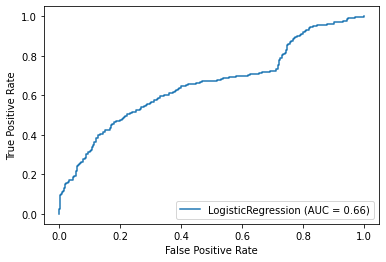

In [ ]:
from sklearn.metrics import plot_roc_curve
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()
lr.fit(X_train, y_train)

plot_roc_curve(lr, X_test, y_test);

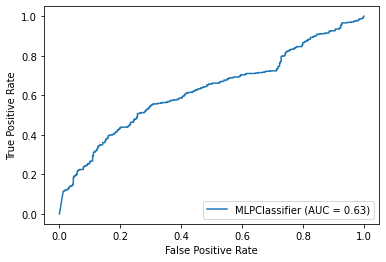

In [ ]:
# Neuron Network
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(1000,1000), max_iter=500, solver='adam')
mlp.fit(X_train, y_train)

plot_roc_curve(mlp, X_test, y_test);


learning on dataset MIMICS
training: (10)
Test set score: 0.608541
Test set loss: 0.460542
training: (10,5)
Test set score: 0.622776
Test set loss: 0.421870
training: (50)
Test set score: 0.590747
Test set loss: 0.227595
training: (50,25)
Test set score: 0.597865
Test set loss: 0.021451
training: (100)
Test set score: 0.601423
Test set loss: 0.110065
training: (100,50)
Test set score: 0.601423
Test set loss: 0.010680


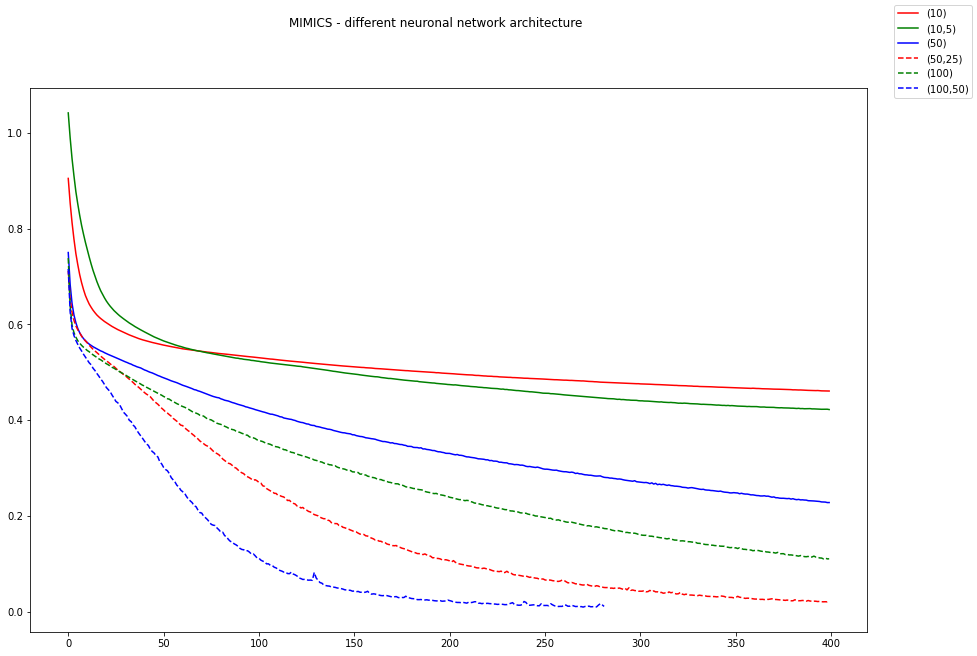

In [ ]:
# different neuronal network architecture
import warnings

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning

params = [{'hidden_layer_sizes' : (10)},
          {'hidden_layer_sizes' : (10,5)},
          {'hidden_layer_sizes' : (50)},
          {'hidden_layer_sizes' : (50,25)},
          {'hidden_layer_sizes' : (100)},
          {'hidden_layer_sizes' : (100,50)}
         ]

labels = ["(10)", "(10,5)",
          "(50)","(50,25)", "(100)","(100,50)"
         ]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'}
            ]

def plot_on_dataset(X_train, y_train, X_test, y_test):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)
    

    mlps = []
    max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(random_state=0, max_iter=max_iter, **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning, module="sklearn")
            mlp.fit(X_train, y_train)

        mlps.append(mlp)
        print("Test set score: %f" % mlp.score(X_test, y_test))
        print("Test set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        plt.plot(mlp.loss_curve_, label=label, **args)

fig = plt.figure(figsize=(15, 10))
fig.suptitle('MIMICS - different neuronal network architecture')
plot_on_dataset(X_train, y_train, X_test, y_test)

fig.legend(labels)
plt.show()


learning on dataset MIMICS
training: constant learning-rate
Test set score: 0.604982
Test set loss: 0.030257
training: constant with momentum
Test set score: 0.591934
Test set loss: 0.156093
training: constant with Nesterov's momentum
Test set score: 0.612100
Test set loss: 0.018765
training: inv-scaling learning-rate
Test set score: 0.639383
Test set loss: 0.606169
training: inv-scaling with momentum
Test set score: 0.637011
Test set loss: 0.539273
training: inv-scaling with Nesterov's momentum
Test set score: 0.634638
Test set loss: 0.543504
training: adam
Test set score: 0.615658
Test set loss: 0.074476


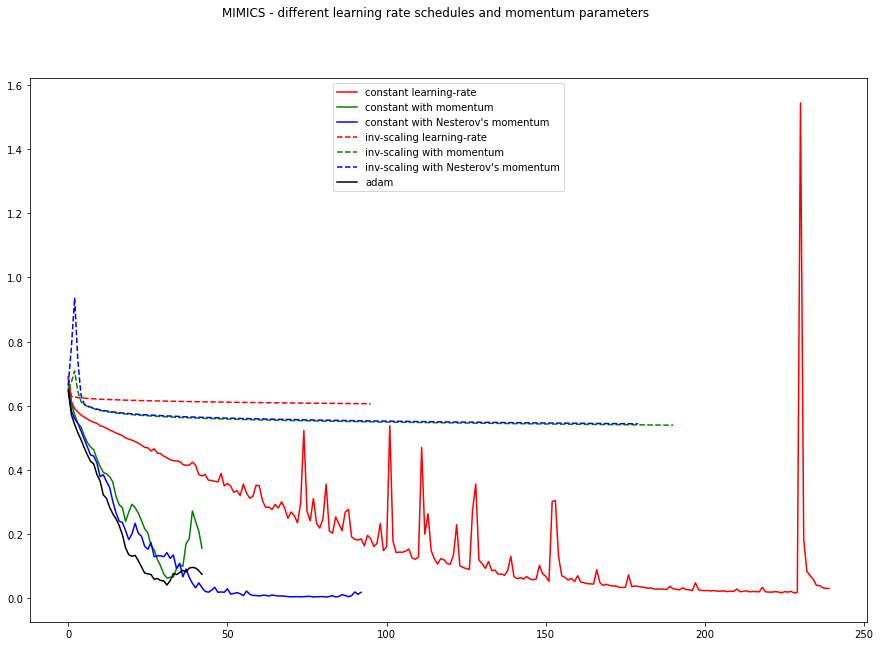

In [ ]:
# different learning rate schedules and momentum parameters
import warnings

import matplotlib.pyplot as plt

from sklearn.neural_network import MLPClassifier
from sklearn.exceptions import ConvergenceWarning

params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': 0,
           'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': True, 'learning_rate_init': 0.2},
          {'solver': 'sgd', 'learning_rate': 'invscaling', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 0.2},
          {'solver': 'adam', 'learning_rate_init': 0.01}]

labels = ["constant learning-rate", "constant with momentum",
          "constant with Nesterov's momentum",
          "inv-scaling learning-rate", "inv-scaling with momentum",
          "inv-scaling with Nesterov's momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'green', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'blue', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]

def plot_on_dataset(X_train, y_train, X_test, y_test):
    # for each dataset, plot learning for each learning strategy
    print("\nlearning on dataset %s" % name)

    mlps = []
    max_iter = 400

    for label, param in zip(labels, params):
        print("training: %s" % label)
        mlp = MLPClassifier(random_state=0, max_iter=max_iter, hidden_layer_sizes=(100,50), **param)

        # some parameter combinations will not converge as can be seen on the
        # plots so they are ignored here
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=ConvergenceWarning,
                                    module="sklearn")
            mlp.fit(X_train, y_train)

        mlps.append(mlp)
        print("Test set score: %f" % mlp.score(X_test, y_test))
        print("Test set loss: %f" % mlp.loss_)
    for mlp, label, args in zip(mlps, labels, plot_args):
        plt.plot(mlp.loss_curve_, label=label, **args)

fig = plt.figure(figsize=(15, 10))
fig.suptitle('MIMICS - different learning rate schedules and momentum parameters')
plot_on_dataset(X_train, y_train, X_test, y_test)
plt.legend(labels, loc="upper center")
plt.show()

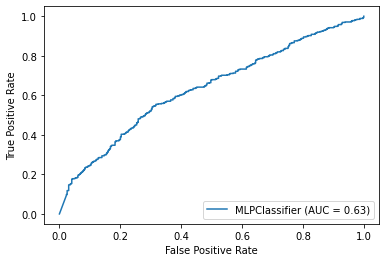

In [ ]:
# Neuron Network best solution
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=0, max_iter=500,
                    hidden_layer_sizes=(100,50), 
                    solver='sgd',  learning_rate='constant', momentum=.9, nesterovs_momentum=True, learning_rate_init=0.2)
mlp.fit(X_train, y_train)

plot_roc_curve(mlp, X_test, y_test);

# Conclusion...

Very often single neural networks such as MLP give worse results than logistic regression. 

To do better, more sophisticated architectures based on CNN or RNN must be used.

So it is always very important to build a baseline to know if our solution is good or bad.